<img src="imgs/mioti_empire.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S4: Data augmentation

`General, sabemos que quiere dejar las trincheras para pasar a su nuevo cargo de LORD DE LOS DATOS en el IMPERIO GALÁCTICO. Está usted a prueba para un sistema crítico para el IMPERIO GALÁCTICO, pues después de las incursiones en Scarif, debemos proceder con un método de detección de transmisiones enemigas dentro de nuestra órbita. Esta será su carta de presentación.`

`Para ello, se le dispondrá de un set de datos extraído de los últimos intentos de ataque en nuestro silo de planos de armas secretas. Estos datos muestran obviamente y gracias al trabajo del antiguo general al mando, ya *jubilado*, un problema grave de desbalanceo en cuanto a tipología de los datos, así que será su labor trabajar con ellos para conseguir un balanceo orden y deacuerdo a las directrices del glorioso IMPERIO GALÁCTICO.`

`Como primera tarea, se le solicita un primer vistazo a los datos.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(1234)

tr = pd.read_csv("data/transmission_small.csv")
tr['Class'].value_counts()

0    100000
1       492
Name: Class, dtype: int64

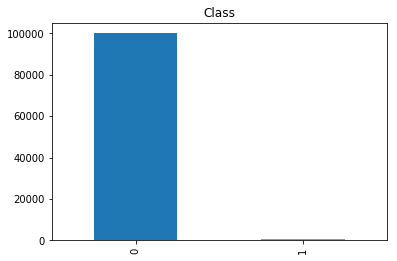

In [2]:
#Se muestra un desbalanceo de las clases en el histograma
tr['Class'].value_counts().plot(kind='bar', title='Class')

`Se necesita entender la magnitud del problema. Informe del posible desbalanceo de los datos, tanto por escrito como mediante la gráfica que usted considere oportuna`

Se observa el desbalanceo en las gráficas de barras y de puntos. Si se considera la detección de fuerzas enemigas como los 'unos' se produce un claro desbalanceo con 492 muestras vs 100000 para las señales que no han mostrado esa detección.

In [3]:
tr

,V1,V2,Class
0,2.049094,0.186189,0
1,2.125540,-0.030714,0
2,-4.155859,-5.705748,0
3,-0.566420,-0.579576,0
4,0.060858,-0.261762,0
5,-1.103430,1.121015,0
6,2.219720,-1.432613,0
7,2.060998,0.050476,0
8,1.611819,-0.552408,0
9,0.965927,-0.182787,0


`También deberá conocer en qué rango se manejan los datos y con qué estamos trabajando. Una gráfica de puntos podría ser lo más adecuado ahora.`

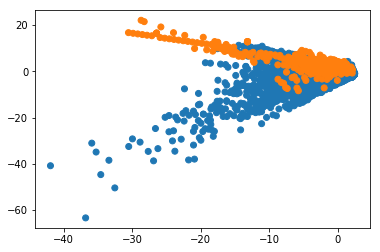

In [4]:
#Se representa en puntos para ver la distribución de las clases
colors = tr['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr['V1'], y = tr['V2'], c=colors)

`Le proponemos ahora una función sencilla para evaluar su sistema de mejora de los datos. Esta función no deberá modificarse y como único requisito deberá de suministrar los datos como parámetro.`

In [5]:
def evaluar_sistema(data_variables, class_variable):
    # Recibe:
    # - data_variables: dataframe con dos columnas siendo estas las variables de datos.
    # - class_variable: dataframe con una columna siendo esta la clase de transmisión.
    # Imprime:
    # - puntuación de clasificación.
    print("Evaluando...")
    clf = LinearSVC().fit(data_variables, class_variable.values.ravel())
    predicted = clf.predict(data_variables)
    
    puntos = 0
    for ci, pi in zip(class_variable.values.ravel(), predicted):
        if ci != pi:
            n = 1 if ci == 0 else 50
        else:
            n = 0
        puntos += n
        
    print("Puntuación obtenida: {} (más alta es peor)".format(puntos))

In [6]:
evaluar_sistema(tr[['V1', 'V2']], tr[['Class']])

Evaluando...
Puntuación obtenida: 24350 (más alta es peor)


***

`Ahora el trabajo es todo suyo, General. Deberá trabajar con nuestros datos y conseguir disminuir esa puntuación al máximo posible. Documente todos los pasos e incluya de sus valoraciones al final del informe.`

Filas que nos quedamos: 984


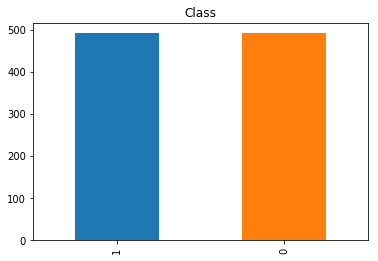

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)
rus.fit_sample(tr[['V1', 'V2']], tr[['Class']].values.ravel())

print('Filas que nos quedamos:', len(rus.sample_indices_))
tr_undersampled = tr.iloc[rus.sample_indices_]
tr_undersampled['Class'].value_counts().plot(kind='bar', title='Class')

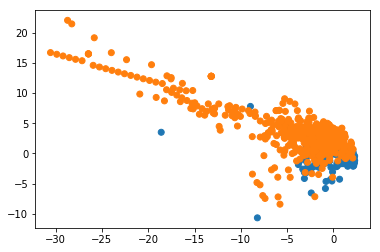

In [8]:
colors = tr_undersampled['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr_undersampled['V1'], y = tr_undersampled['V2'], c=colors)

En primer lugar, se realiza un undersampling random, el cual permite disminuir la clase mayoritaria que desbalancea el dataset. Se observa que el output tiene el mismo número de clases de ambos tipos de señales de transmisión; y las detecciones enemigas siguen intactas.

In [9]:
evaluar_sistema(tr_undersampled[['V1', 'V2']], tr_undersampled[['Class']])

Evaluando...
Puntuación obtenida: 6961 (más alta es peor)


El resultado de la evaluación se reduce por eliminar la componente desbalanceada. Se continua el ejercicio realizando otro undersampling de las muestras vecinas the la clase enemiga. En principio, la cercanía de las muestras entre sí, así como su proximidad con las transmisiones no enemigas, puede resultar costoso a la hora de predecir con este dataset como modelo.

Filas que nos quedamos: 642


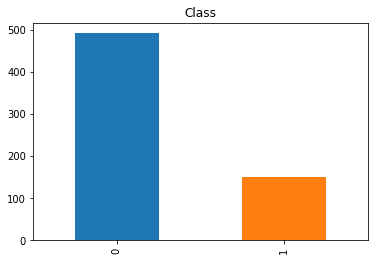

In [10]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors = 25, random_state=0)
enn.fit_sample(tr_undersampled[['V1', 'V2']], tr_undersampled[['Class']].values.ravel())
print('Filas que nos quedamos:', len(enn.sample_indices_))
tr_enn = tr_undersampled.iloc[enn.sample_indices_]
tr_enn['Class'].value_counts().plot(kind='bar', title='Class')

Evaluando...
Puntuación obtenida: 1009 (más alta es peor)


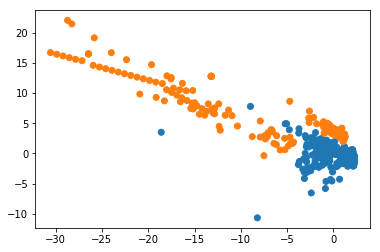

In [11]:
colors = tr_enn['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr_enn['V1'], y = tr_enn['V2'], c=colors)
evaluar_sistema(tr_enn[['V1', 'V2']], tr_enn[['Class']])

Se observa como el undersampling de vecinos ha actuado sobre la zona más densa de las señales enemigas, provocando un mejor resultado en la evaluación, a costa de reducir el número de muestras objetivo (los 'unos', o señales enemigas). Debido a que esto puede resultar engañoso y peligroso para el modelo predictivo, se realiza un oversampling para igualar el número de muestras objetivo que al inicio, para dejar el dataset final lo más realista posible con respecto al original.

Datos después de SMOTE: 984


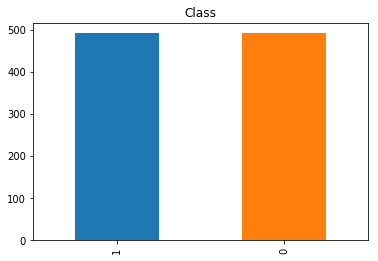

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_sample(tr_enn[['V1', 'V2']], tr_enn[['Class']].values.ravel())

# convertimos a DataFrame por comodidad y renombramos las columnas de datos en X a los nombres que teníamos.
tr_smote = pd.DataFrame(X).rename(columns = {0 : 'V1', 1 : 'V2'})
tr_smote['Class'] = y

print("Datos después de SMOTE: {}".format(len(y)))
tr_smote['Class'].value_counts().plot(kind='bar', title='Class')


Evaluando...
Puntuación obtenida: 1621 (más alta es peor)


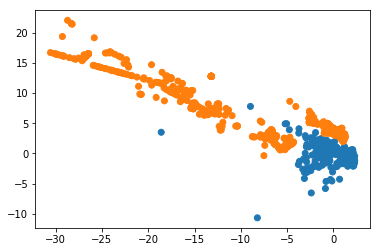

In [13]:
colors = tr_smote['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr_smote['V1'], y = tr_smote['V2'], c=colors)
evaluar_sistema(tr_smote[['V1', 'V2']], tr_smote[['Class']])

Datos después de ADASYN: 984
Evaluando...
Puntuación obtenida: 869 (más alta es peor)


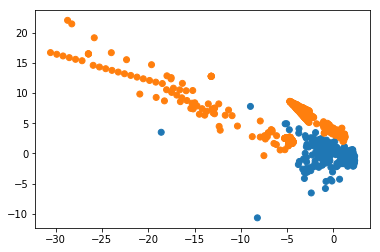

In [14]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X, y = ada.fit_sample(tr_enn[['V1', 'V2']], tr_enn[['Class']].values.ravel())

# convertimos a DataFrame por comodidad y renombramos las columnas de datos en X a los nombres que teníamos.
tr_ada = pd.DataFrame(X).rename(columns = {0 : 'V1', 1 : 'V2'})
tr_ada['Class'] = y

print("Datos después de ADASYN: {}".format(len(y)))
colors = tr_ada['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr_ada['V1'], y = tr_ada['V2'], c=colors)
evaluar_sistema(tr_ada[['V1', 'V2']], tr_ada[['Class']])

A la hora de realizar el oversampling para que los Positivos Verdaderos se mantengan en la predicción con un número 
de muestras igual al del dataset original, se observa que SMOTE y ADASYN muestran resultados distintos. Así como SMOTE hace un oversampling por igual en cuanto a los vecinos de las muestras naranjas (1), ADASYN se centra en las partes donde más densidad hay; por lo que muestra un resultado más parecido al dataset original.

Esto explica un resultado mejor tras la aplicación de ADASYN ya que la representación de outliers se ajusta mejor con el modelo original


¿Has logrado proteger al Imperio Galáctico de transmisiones enemigas? ¿O has tenido problemas de "jubilación"?
* ¿Qué problemas ves a estos métodos de data augmentation?
* ¿Qué crees que es más razonable cuando te enfrentas a un problema de este tipo?
* La función de evaluación del sistema penaliza con un punto si la clase predecida es de valor 1 pero 50 puntos si la clase predecida es de valor 0. ¿Por qué crees que pasa esto?


* Los principales problemas pueden venir con una pérdida de la información original a la hora de entrenar nuestro modelo con el dataset de inicio. En definitiva, si el dataset balanceado pierde las propiedas principales del dataset de inicio, se puede perder el foco de la aplicación/problema original
* En primer lugar, tendría sentido clasificar el dataset y sus clases, alienarlo con el próposito final del problema y ajustar el balanceo de forma correspondiente.
* En este caso el objetivo final es detectar transimisiones enemigas que se representan con la clase '1', por lo que se penaliza menos al predecir esta clase que la clase 0. ( los falsos positivos y negativos se necesitan a menor medida con respecto a la clase 1)

***

### Punto extra

`Como tarea final, se le exige que nos facilite una identificación. Muestre su rostro real y provea al IMPERIO GALÁCTICO de datos suficientes para poder identificale desde todos los ángulos posibles una vez pase a formar parte de nuestro equipo de datos. Se requiere un mínimo de 5 ejemplos de su rostro para entrenar correctamente el sistema y que nuestras medidas de seguridad no cometan el error de considerarlo una amenaza.`

In [15]:
## Hazte una "selfie" y copiala en la carpeta imgs de este challenge. Cárgala y visualízala correctamente.
## Procésala como se te mostró en el worksheet para que el Imperio pueda identificarte correctamente.

In [16]:
from skimage import io, transform
import numpy as np
img = io.imread("imgs/Foto.jpg")
print("Dimensión Y: {}, Dimensión X: {}, Canales: {}".format(img.shape[0], img.shape[1], img.shape[2]))

Dimensión Y: 378, Dimensión X: 307, Canales: 3


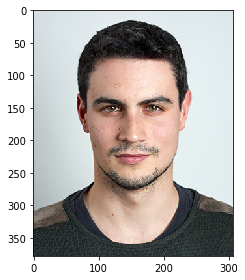

In [17]:
io.imshow(img)

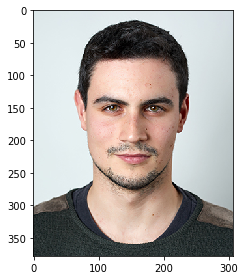

In [18]:
io.imshow(np.fliplr(img))

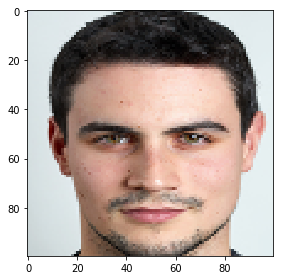

In [19]:
startx = 50
starty = 20    
cropped =  img[starty:starty+250,startx:startx+200, :]
io.imshow(transform.resize(cropped, (100, 100)))

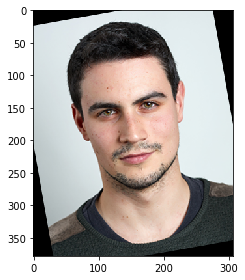

In [20]:
io.imshow(transform.rotate(img, 10, resize=False))

In [21]:
from skimage.color import convert_colorspace

In [22]:
img_hsv = convert_colorspace(img, 'RGB', 'HSV')

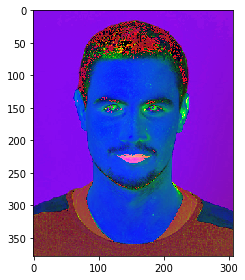

In [23]:
io.imshow(np.fliplr(img_hsv))